In [1]:
import pandas as pd

url_general_results = './data/general_results.csv'
url_candidates_results = './data/candidats_results.csv'

# Spécification des types de données pour les colonnes essentielles
dtype_general_results = {
    'id_election': 'str',
    'id_brut_miom': 'str',
    'Code du département': 'str',
    'Libellé du département': 'str',
    'Code de la commune': 'str',
    'Libellé de la commune': 'str',
    'Code du b.vote': 'str'
}

dtype_candidates_results = {
    'id_election': 'str',
    'id_brut_miom': 'str',
    'Code du département': 'str',
    'Libellé du département': 'str',
    'Code de la commune': 'str',
    'Libellé de la commune': 'str',
    'Code du b.vote': 'str',
    'Nom du candidat': 'str',
    'Prénom du candidat': 'str',
    'Sexe du candidat': 'str',
    'Date de naissance': 'str',
    'Code du parti politique': 'str',
    'Libellé du parti politique': 'str',
    'Elu': 'str',
    'Code de la circonscription': 'str',
    'Libellé de la circonscription': 'str'
}

# Chargement des données des résultats généraux des élections
general_results = pd.read_csv(url_general_results, delimiter=';', dtype=dtype_general_results, low_memory=False)

print(general_results.head())

# Chargement des données des résultats par candidat
candidats_results = pd.read_csv(url_candidates_results, delimiter=';', dtype=dtype_candidates_results, low_memory=False)

print(general_results.head())


    id_election id_brut_miom Code du département Libellé du département  \
0  2019_euro_t1   01001_0001                  01                    Ain   
1  2019_euro_t1   01002_0001                  01                    Ain   
2  2019_euro_t1   01004_0001                  01                    Ain   
3  2019_euro_t1   01004_0002                  01                    Ain   
4  2019_euro_t1   01004_0003                  01                    Ain   

  Code de la commune    Libellé de la commune Code du b.vote  Inscrits  \
0                001  L'Abergement-Clémenciat           0001       601   
1                002    L'Abergement-de-Varey           0001       210   
2                004        Ambérieu-en-Bugey           0001      1050   
3                004        Ambérieu-en-Bugey           0002      1106   
4                004        Ambérieu-en-Bugey           0003      1058   

   Abstentions  % Abs/Ins  ...  Nuls  % Nuls/Ins  % Nuls/Vot  Exprimés  \
0          268      44.59  ...

In [2]:
# affichage des types de données par colonne
print("Résultats généraux:")
print(general_results.dtypes)

print("Résultats par candidat:")
print(candidats_results.dtypes)

Résultats généraux:
id_election                       object
id_brut_miom                      object
Code du département               object
Libellé du département            object
Code de la commune                object
Libellé de la commune             object
Code du b.vote                    object
Inscrits                           int64
Abstentions                        int64
% Abs/Ins                        float64
Votants                            int64
% Vot/Ins                        float64
Blancs                           float64
% Blancs/Ins                     float64
% Blancs/Vot                     float64
Nuls                               int64
% Nuls/Ins                       float64
% Nuls/Vot                       float64
Exprimés                           int64
% Exp/Ins                        float64
% Exp/Vot                        float64
Code de la circonscription       float64
Libellé de la circonscription     object
Code du canton                   floa

In [3]:
# affichage des informations sur les données
print("Résultats généraux:")
print(general_results.info())

print("Résultats par candidat:")
print(candidats_results.info())

Résultats généraux:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843568 entries, 0 to 2843567
Data columns (total 25 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   id_election                    object 
 1   id_brut_miom                   object 
 2   Code du département            object 
 3   Libellé du département         object 
 4   Code de la commune             object 
 5   Libellé de la commune          object 
 6   Code du b.vote                 object 
 7   Inscrits                       int64  
 8   Abstentions                    int64  
 9   % Abs/Ins                      float64
 10  Votants                        int64  
 11  % Vot/Ins                      float64
 12  Blancs                         float64
 13  % Blancs/Ins                   float64
 14  % Blancs/Vot                   float64
 15  Nuls                           int64  
 16  % Nuls/Ins                     float64
 17  % Nuls/Vot                

<Axes: >

<Axes: >

Résultats généraux:
id_election                            0
id_brut_miom                           0
Code du département                    0
Libellé du département           1795437
Code de la commune                     0
Libellé de la commune                  0
Code du b.vote                         0
Inscrits                               0
Abstentions                            0
% Abs/Ins                              3
Votants                                0
% Vot/Ins                              3
Blancs                           1795437
% Blancs/Ins                     1795440
% Blancs/Vot                     1795496
Nuls                                   0
% Nuls/Ins                             3
% Nuls/Vot                           118
Exprimés                               0
% Exp/Ins                              3
% Exp/Vot                            118
Code de la circonscription       2022245
Libellé de la circonscription    2288674
Code du canton                   2322

c:\EPSI\MSPR_IA_DATA_V2\myenv\Lib\site-packages\matplotlib\image.py:181: UserWarning: Data with more than 2**24 rows cannot be accurately displayed. Downsampling to less than 2**24 rows before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**24 rows'))


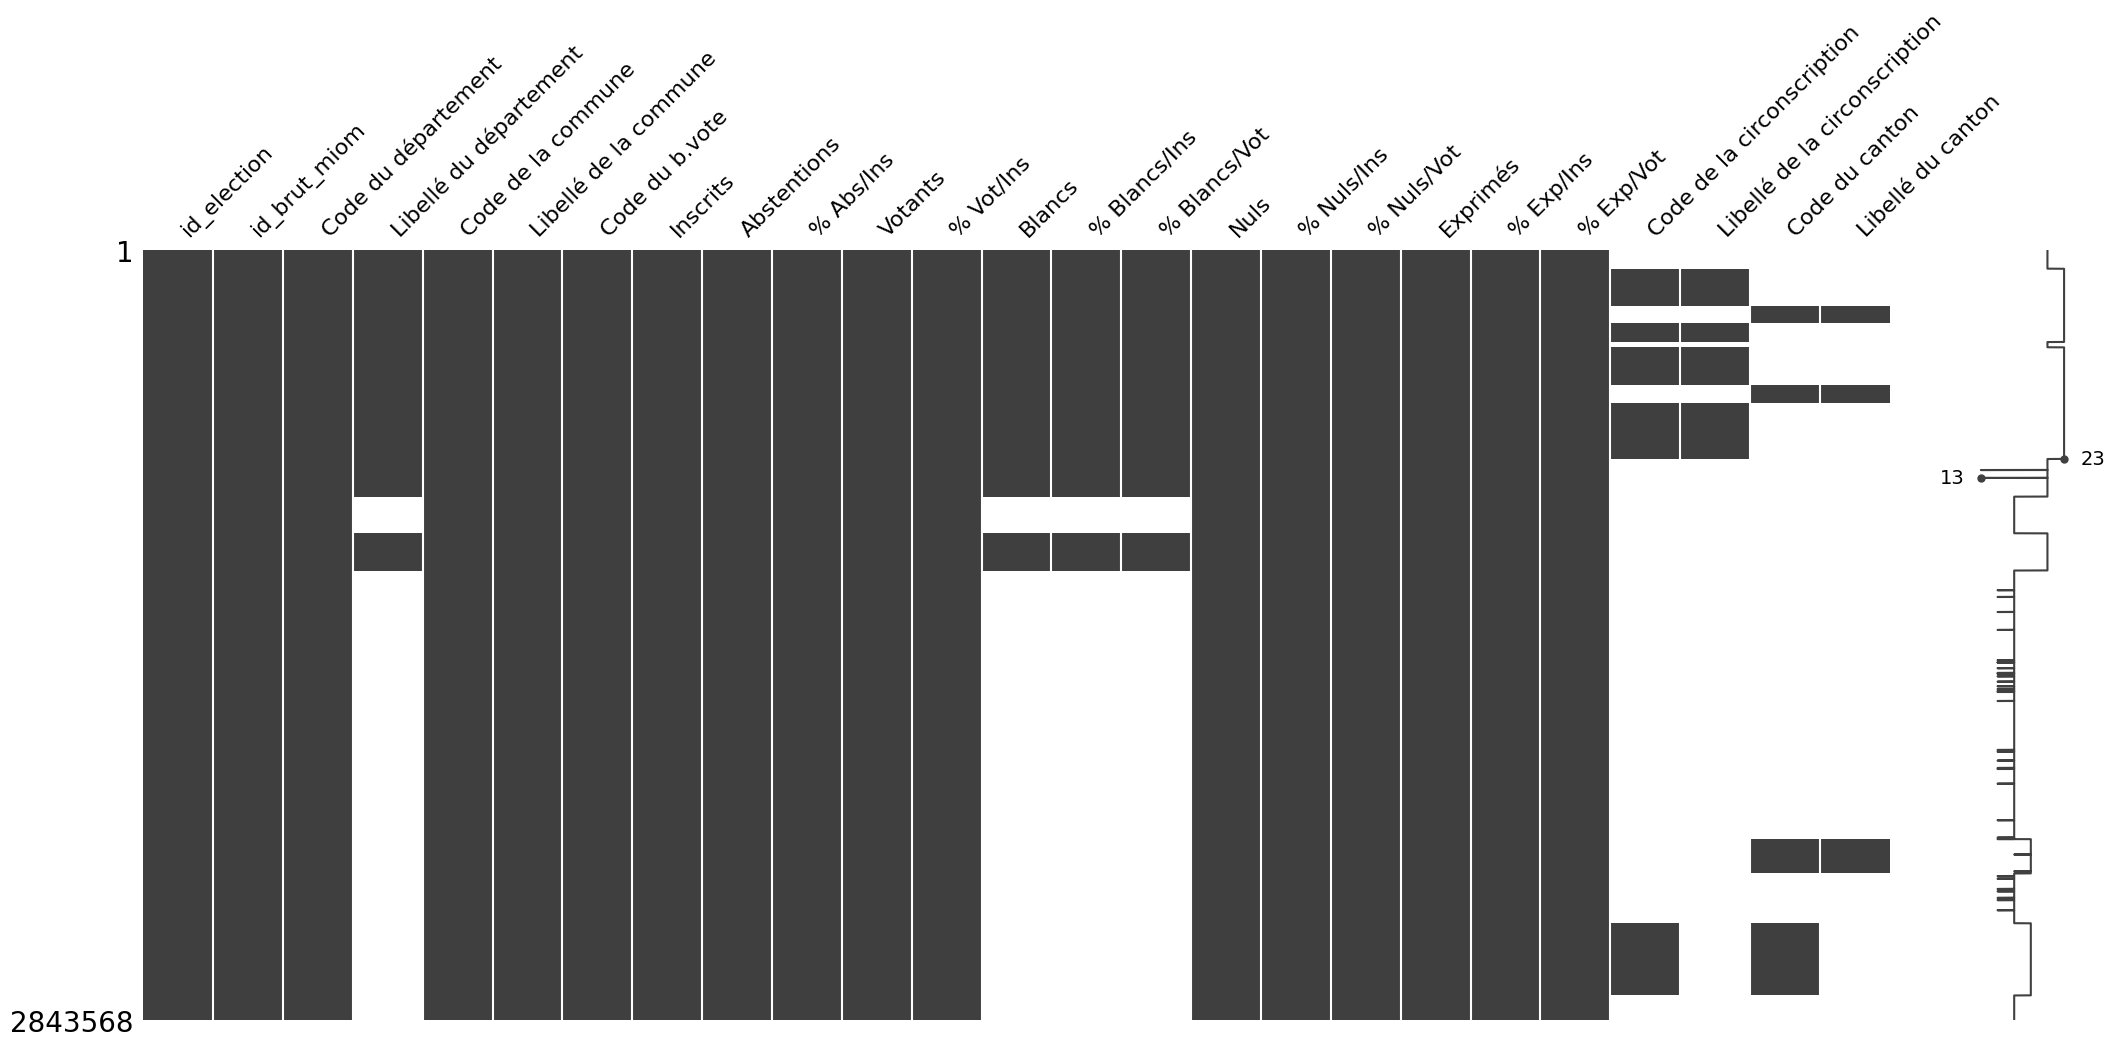

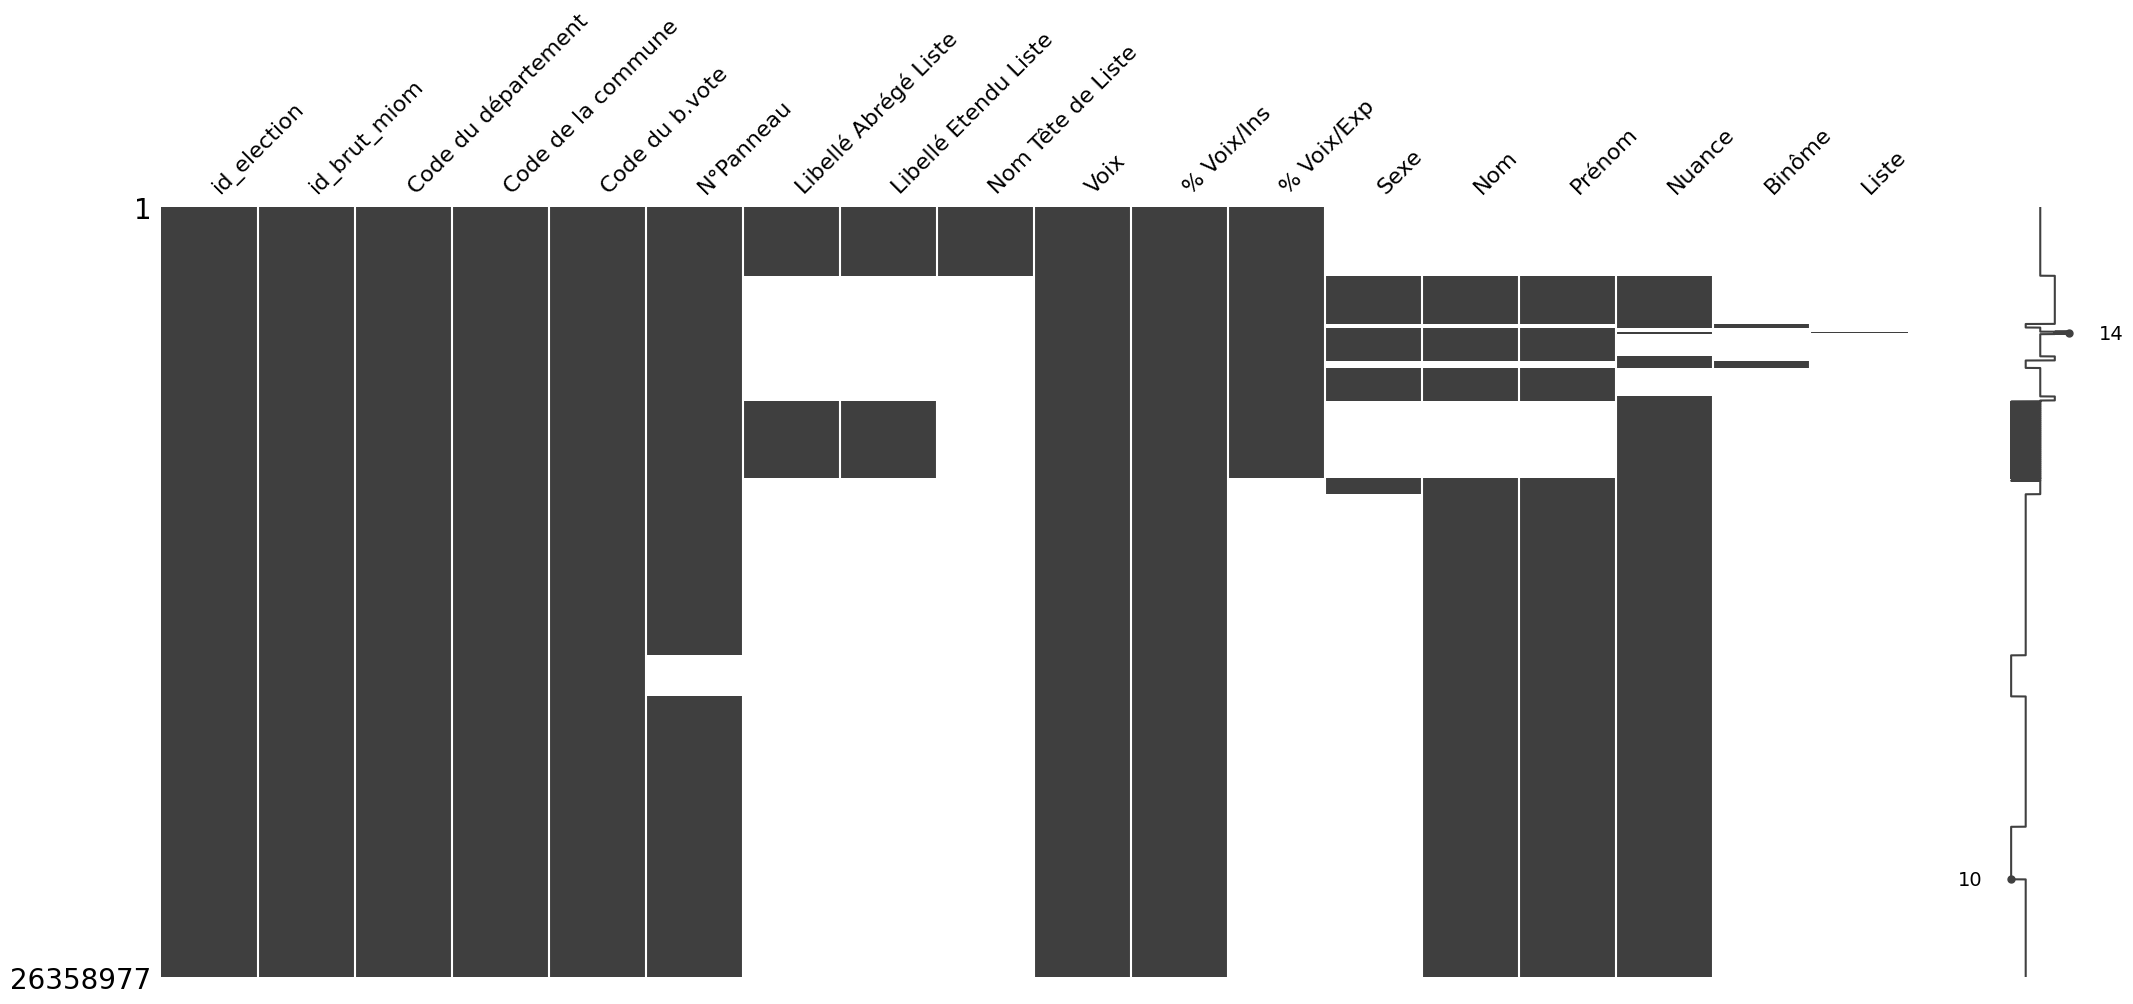

In [4]:
# visualisation des données manquantes avec missingo
import missingno as msno
%matplotlib inline
from IPython.display import display

# matrice de nullité des données
display(msno.matrix(general_results))

display(msno.matrix(candidats_results))


# nombre de valeurs manquantes par colonne
print("Résultats généraux:")
print(general_results.isnull().sum())

print("Résultats par candidat:")
print(candidats_results.isnull().sum())

In [5]:
# filtrage des données, nous allons garder uniquement ce qui concerne la région occitanie
# cela concerne les codes départements 09, 11, 12, 30, 31, 32, 34, 46, 48, 65, 66, 81, 82
occitanie_departments = ['09', '11', '12', '30', '31', '32', '34', '46', '48', '65', '66', '81', '82']

general_results_occitanie = general_results[general_results['Code du département'].isin(occitanie_departments)]
candidats_results_occitanie = candidats_results[candidats_results['Code du département'].isin(occitanie_departments)]

In [6]:
# Nous allons supprimer les colonnes avec trop de valeurs manquantes
# c'est à dire celles qui ont plus de 50% de valeurs manquantes
threshold = 0.5
general_results_occitanie = general_results_occitanie.dropna(thresh=threshold*general_results_occitanie.shape[0], axis=1)
candidats_results_occitanie = candidats_results_occitanie.dropna(thresh=threshold*candidats_results_occitanie.shape[0], axis=1)

In [7]:
# sauvegarde des données filtrées
general_results_occitanie.to_csv('./data/general_results_occitanie.csv', index=False)
candidats_results_occitanie.to_csv('./data/candidats_results_occitanie.csv', index=False)

In [8]:
general_results_occitanie.head()

,id_election,id_brut_miom,Code du département,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot
4452,2019_euro_t1,09001_0001,09,001,Aigues-Juntes,0001,55,16,29.09,39,70.91,2,3.64,5.13,34,61.82,87.18
4453,2019_euro_t1,09002_0001,09,002,Aigues-Vives,0001,468,214,45.73,254,54.27,7,1.50,2.76,243,51.92,95.67
4454,2019_euro_t1,09003_0001,09,003,L'Aiguillon,0001,328,145,44.21,183,55.79,12,3.66,6.56,167,50.91,91.26
4455,2019_euro_t1,09004_0001,09,004,Albiès,0001,110,40,36.36,70,63.64,3,2.73,4.29,61,55.45,87.14
4456,2019_euro_t1,09005_0001,09,005,Aleu,0001,148,58,39.19,90,60.81,0,0.00,0.00,90,60.81,100.00


In [9]:
candidats_results_occitanie.head()

,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Voix,% Voix/Ins,Nom,Prénom,Nuance
4452,2019_euro_t1,09001_0001,09,001,0001,1.0,7.0,12.73,NaN,NaN,NaN
4453,2019_euro_t1,09002_0001,09,002,0001,1.0,22.0,4.70,NaN,NaN,NaN
4454,2019_euro_t1,09003_0001,09,003,0001,1.0,15.0,4.57,NaN,NaN,NaN
4455,2019_euro_t1,09004_0001,09,004,0001,1.0,8.0,7.27,NaN,NaN,NaN
4456,2019_euro_t1,09005_0001,09,005,0001,1.0,13.0,8.78,NaN,NaN,NaN


In [11]:
# id_election se compose de l'année de l'élection, du type d'élection et du tour
# nous allons séparer ces informations dans des colonnes différentes
general_results_occitanie['year'] = general_results_occitanie['id_election'].str[:4]
general_results_occitanie['election_type'] = general_results_occitanie['id_election'].str[4:5]
general_results_occitanie['tour'] = general_results_occitanie['id_election'].str[5:]

candidats_results_occitanie['year'] = candidats_results_occitanie['id_election'].str[:4]
candidats_results_occitanie['election_type'] = candidats_results_occitanie['id_election'].str[4:5]
candidats_results_occitanie['tour'] = candidats_results_occitanie['id_election'].str[5:]

# affichons le nombre de valeurs uniques pour chacune de ces colonnes, et aussi pour la colonne id_election pour être sûr
print("Nombre de valeurs uniques:")
print("-"*20)
print("Résultats généraux:")
print("year:", general_results_occitanie['year'].nunique())
print("election_type:", general_results_occitanie['election_type'].nunique())
print("tour:", general_results_occitanie['tour'].nunique())
print("id_election:", general_results_occitanie['id_election'].nunique())

print("-"*20)
print("\n")

print("Résultats par candidat:")
print("-"*20)
print("year:", candidats_results_occitanie['year'].nunique())
print("election_type:", candidats_results_occitanie['election_type'].nunique())
print("tour:", candidats_results_occitanie['tour'].nunique())
print("id_election:", candidats_results_occitanie['id_election'].nunique())


Nombre de valeurs uniques:
--------------------
Résultats généraux:
year: 18
election_type: 1
tour: 13
id_election: 49
--------------------


Résultats par candidat:
--------------------
year: 18
election_type: 1
tour: 13
id_election: 49


In [14]:
# vérifions également s'il y a des valeurs de id_election qui n'ont pas le bon format

# Identifier les valeurs non conformes
valeurs_non_conformes_general = general_results_occitanie[~general_results_occitanie['id_election'].str.match(r'\d{4}_[a-zA-Z]+_t\d')]
valeurs_non_conformes_candidats = candidats_results_occitanie[~candidats_results_occitanie['id_election'].str.match(r'\d{4}_[a-zA-Z]+_t\d')]

# Afficher les valeurs non conformes
print("Valeurs non conformes dans general_results_occitanie :")
print(valeurs_non_conformes_general['id_election'])

print("Valeurs non conformes dans candidats_results_occitanie :")
print(valeurs_non_conformes_candidats['id_election'])

# Compter le nombre de valeurs non conformes
nombre_non_conformes_general = valeurs_non_conformes_general.shape[0]
nombre_non_conformes_candidats = valeurs_non_conformes_candidats.shape[0]

print(f"Nombre de valeurs non conformes dans general_results_occitanie : {nombre_non_conformes_general}")
print(f"Nombre de valeurs non conformes dans candidats_results_occitanie : {nombre_non_conformes_candidats}")


Valeurs non conformes dans general_results_occitanie :
Series([], Name: id_election, dtype: object)
Valeurs non conformes dans candidats_results_occitanie :
Series([], Name: id_election, dtype: object)
Nombre de valeurs non conformes dans general_results_occitanie : 0
Nombre de valeurs non conformes dans candidats_results_occitanie : 0
